# **Importing libraries **

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import string 
import matplotlib.pyplot as plt


# **Reading the dataset**

In [2]:
data = pd.read_csv('/content/Dataset-SA_nlp.csv')

In [3]:
data

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


# **Checking null values**

In [4]:
data.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [5]:
data = data.dropna()

# **Checking data type**

In [6]:
data.dtypes

product_name     object
product_price    object
Rate             object
Review           object
Summary          object
Sentiment        object
dtype: object

# **Checking duplicates in the data**

In [7]:
data.duplicated().sum()

25912

In [8]:
# droping duplicates 
data = data.drop_duplicates()

In [9]:
data.shape

(154467, 6)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154467 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   154467 non-null  object
 1   product_price  154467 non-null  object
 2   Rate           154467 non-null  object
 3   Review         154467 non-null  object
 4   Summary        154467 non-null  object
 5   Sentiment      154467 non-null  object
dtypes: object(6)
memory usage: 8.2+ MB


In [11]:
data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


# **EDA (Exploratory data analysis)**

In [12]:
data['Rate'].value_counts()

5                                                                    88726
4                                                                    30484
1                                                                    17475
3                                                                    12500
2                                                                     5279
Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)             1
Bajaj DX 2 L/W Dry Iron                                                  1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)        1
Name: Rate, dtype: int64

In [13]:
data = data[(data['Rate']!= 'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)') & (data['Rate'] != 'Bajaj DX 2 L/W Dry Iron') & (data['Rate'] != 'Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)')]

In [14]:
data['Rate'].value_counts()

5    88726
4    30484
1    17475
3    12500
2     5279
Name: Rate, dtype: int64

In [15]:
data['Sentiment'].value_counts()

positive    122806
negative     23352
neutral       8306
Name: Sentiment, dtype: int64

(array([30605., 18291., 24600., 13659., 26152., 11990.,  7624.,  8195.,
         6458.,  6890.]),
 array([  0. ,  47.5,  95. , 142.5, 190. , 237.5, 285. , 332.5, 380. ,
        427.5, 475. ]),
 <BarContainer object of 10 artists>)

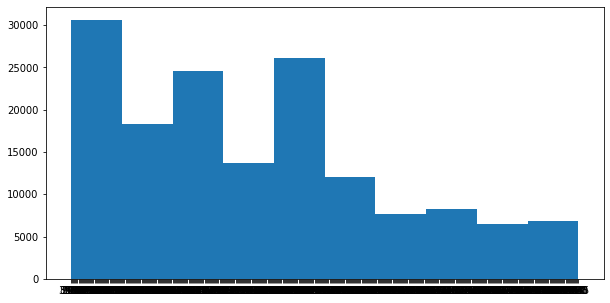

In [16]:
plt.figure(figsize = (10,5))
plt.hist(data['product_price'])

<Axes: xlabel='Rate', ylabel='count'>

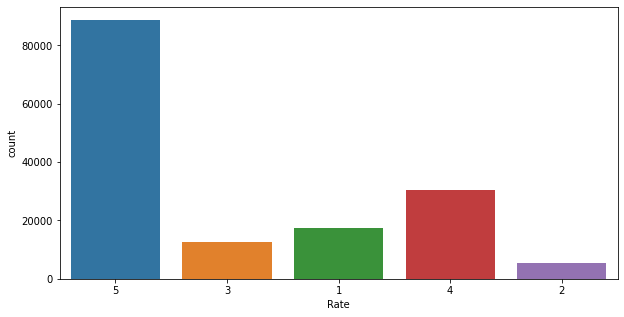

In [17]:
plt.figure(figsize = (10,5))
sns.countplot(x=data['Rate'],data = data)

<Axes: xlabel='Sentiment', ylabel='count'>

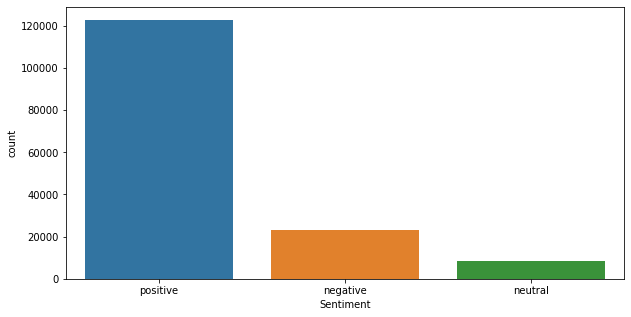

In [18]:
plt.figure(figsize = (10,5))
sns.countplot(x=data['Sentiment'],data = data)

# **Removing punctuation**

In [19]:
punctuation  = string.punctuation

In [20]:
data['Summary'] = data['Summary'].str.replace('[{}]'.format(punctuation),'')

<ipython-input-20-36c192cc7d31>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Summary'] = data['Summary'].str.replace('[{}]'.format(punctuation),'')


In [21]:
data

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205045,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,terrific,good quality products,positive
205046,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,classy product,beautiful set very nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [22]:
df = data[(data['Sentiment']== 'positive') | (data['Sentiment']== 'negative')]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146158 entries, 0 to 205050
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   146158 non-null  object
 1   product_price  146158 non-null  object
 2   Rate           146158 non-null  object
 3   Review         146158 non-null  object
 4   Summary        146158 non-null  object
 5   Sentiment      146158 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


In [24]:
df.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

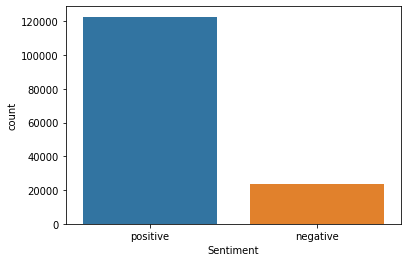

In [25]:
sns.countplot(data = df,x = 'Sentiment')

In [26]:
df['Sentiment'] = df['Sentiment'].map({'negative' : 1,'positive':0})

<ipython-input-26-d8077c1be389>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'].map({'negative' : 1,'positive':0})


# **Splitting the data**

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

x = df['Summary']
y = df['Sentiment']

cv = CountVectorizer()

x = cv.fit_transform(x)

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=7)

In [29]:
x_train.shape,x_test.shape

((109618, 44617), (36540, 44617))

In [30]:
from sklearn.naive_bayes import MultinomialNB

nb =MultinomialNB()

In [31]:
paramgrid = {
    'alpha': [0.01,0.1,10,20,50,100],
    'fit_prior':[True,False]
}

In [32]:
gridcv = GridSearchCV(nb,paramgrid,cv= 5)

# **Prediction**

In [33]:
gridcv.fit(x_train,y_train)

y_pred = gridcv.predict(x_test)

In [34]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix

print('classification_report',classification_report(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))

classification_report               precision    recall  f1-score   support

           0       0.96      0.96      0.96     30718
           1       0.80      0.78      0.79      5822

    accuracy                           0.93     36540
   macro avg       0.88      0.87      0.88     36540
weighted avg       0.93      0.93      0.93     36540

confusion_matrix [[29592  1126]
 [ 1280  4542]]


In [35]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_pred))

accuracy_score 0.9341543513957307
roc_auc_score 0.8717441240111368


# **using the columns of Review and Sentiment**

In [36]:
X = df['Review']

Y = df['Sentiment']

cv = CountVectorizer()

X = cv.fit_transform(X)

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state=7)

In [38]:
X_train.shape,X_test.shape

((109618, 1247), (36540, 1247))

In [39]:
gridcv = GridSearchCV(nb,paramgrid,cv= 5)

In [40]:
gridcv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 10, 20, 50, 100],
                         'fit_prior': [True, False]})

In [41]:
gridcv.best_params_

{'alpha': 0.01, 'fit_prior': True}

In [42]:
Y_pred = gridcv.predict(X_test)

In [43]:
print('classification_report',classification_report(Y_test,Y_pred))
print('confusion_matrix',confusion_matrix(Y_test,Y_pred))

classification_report               precision    recall  f1-score   support

           0       0.96      0.99      0.97     30718
           1       0.92      0.76      0.83      5822

    accuracy                           0.95     36540
   macro avg       0.94      0.87      0.90     36540
weighted avg       0.95      0.95      0.95     36540

confusion_matrix [[30312   406]
 [ 1401  4421]]


In [44]:
print('accuracy_score',accuracy_score(Y_test,Y_pred))
print('roc_auc_score',roc_auc_score(Y_test,Y_pred))

accuracy_score 0.9505473453749316
roc_auc_score 0.8730720189995766


# **NLTK**

In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [46]:
#nltk.download('punkt')
#nltk.download('stopwords')

In [47]:
stopword = set(stopwords.words("english"))

In [48]:
data

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205045,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,terrific,good quality products,positive
205046,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,classy product,beautiful set very nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [49]:
def preprocess_text(text):
    # tokenize text
    tokens = word_tokenize(text.lower())
    # remove punctuation and stop words
    filtered_tokens = [token for token in tokens if token not in stopword and token not in string.punctuation]
    # re-join filtered tokens into a string
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text


In [50]:
# apply preprocess function to summary column
data['preprocessed_text'] = data['Summary'].apply(preprocess_text)
#data['preprocessed_text_r'] = data['Review'].apply(preprocess_text)

In [51]:
data

,product_name,product_price,Rate,Review,Summary,Sentiment,preprocessed_text
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,great cooler excellent air flow price amazing ...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,best budget 2 fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,quality good power air decent
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,bad product fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,ok ok product
...,...,...,...,...,...,...,...
205045,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,terrific,good quality products,positive,good quality products
205046,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,classy product,beautiful set very nice,positive,beautiful set nice
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive,nice fast delivery
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive,awesome product


<Axes: xlabel='Sentiment', ylabel='count'>

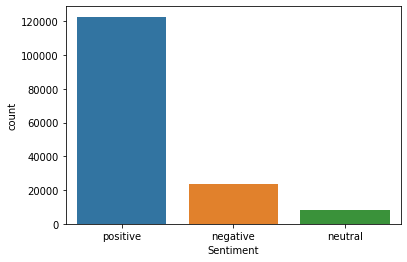

In [52]:
sns.countplot(x = data['Sentiment'],data=data)

In [53]:
data['Sentiment'] = data['Sentiment'].map({'neutral':0,'negative':1,'positive':2})

In [54]:
#x = data['preprocessed_text']
x = cv.fit_transform(data['preprocessed_text'])

y = data['Sentiment']

x_train_,x_test_,y_train_,y_test_ = train_test_split(x,y,test_size = 0.25,random_state=7)

In [55]:
x_train_,x_test_

(<115848x45993 sparse matrix of type '<class 'numpy.int64'>'
 	with 615351 stored elements in Compressed Sparse Row format>,
 <38616x45993 sparse matrix of type '<class 'numpy.int64'>'
 	with 206107 stored elements in Compressed Sparse Row format>)

In [56]:
nb.fit(x_train_,y_train_)

MultinomialNB()

In [57]:
y_pred_ = nb.predict(x_test_)

In [58]:
print('classification_report',classification_report(Y_test,Y_pred))
print('confusion_matrix',confusion_matrix(Y_test,Y_pred))

classification_report               precision    recall  f1-score   support

           0       0.96      0.99      0.97     30718
           1       0.92      0.76      0.83      5822

    accuracy                           0.95     36540
   macro avg       0.94      0.87      0.90     36540
weighted avg       0.95      0.95      0.95     36540

confusion_matrix [[30312   406]
 [ 1401  4421]]


In [59]:
print('accuracy_score',accuracy_score(Y_test,Y_pred))
print('roc_auc_score',roc_auc_score(Y_test,Y_pred))

accuracy_score 0.9505473453749316
roc_auc_score 0.8730720189995766
